# **. Introduction**

In this project, my aim is to determine if there will be rainfall in Australia 
tomorrow. I utilize Python and Scikit-Learn to apply Logistic Regression.

My approach involves constructing a classifier to anticipate rainfall occurrences 
in Australia for the following day.
I employ Logistic Regression to train a binary 
classification model, utilizing the Rain in Australia dataset for this analysis.

Thank to [Prashant Banerjee](http://www.kaggle.com/prashant111) my project inspired by his [code](https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial)

I should mention that I'm new to Kaggle. I completed this project using my local Jupyter Notebook, and my documentation file is separate. I inputted it into the .ipynb file. If you want to see the technical report better, simply download the PDF from my [GitHub](https://github.com/mohammadehsanii/Australian-Weather-Forecast/blob/3d52fdf3038c5f28df5be7952a1bcf06c1ba8fa4/Technical%20Report.pdf)."


# **DataSet Understanding**


We have 23 columns and 145,460 rows comprising both categorical and 
numerical variables. The dataset contains some missing values, which I will 
discuss further in subsequent sections. This dataset encompasses approximately 
10 years of daily weather observations from numerous locations across Australia.  

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import category_encoders as ce
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings

warnings.filterwarnings('ignore')

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [2]:
df = pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')

In [3]:
df.shape

(145460, 23)

In [4]:
col_name = df.columns
col_name

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [6]:
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

#  Categorical variables

In [8]:
# Categorical variables

categorical = [var for var in df.columns if df[var].dtype=='object']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


#  Numerical  variables

In [9]:
# Numerical variables

numerical = [var for var in df.columns if df[var].dtype in ['float64', 'int64']]

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are:', numerical)


There are 16 numerical variables

The numerical variables are: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


# DataSet Structure 
There are 16 numerical variables, which is : 
MinTemp, MaxTemp, Rainfall, Evaporation, Sunshine, WindGustSpeed, 
WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, 
Pressure3pm, Cloud9am, Cloud3pm, Temp9am, Temp3pm 
And, The categorical variables are:  
Date, Location, WindGustDir, WindDir9am, WindDir3pm, RainToday, 
RainTomorrow 

# Summary of numerical & categorical variables

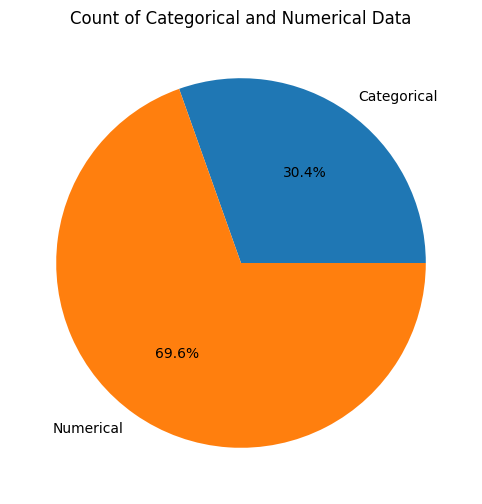

In [10]:
# Define categorical and numerical data
categorical_count = len(categorical)
numerical_count = len(numerical)

# Calculate total data points
total = categorical_count + numerical_count

# Calculate percentages
categorical_percent = (categorical_count / total) * 100
numerical_percent = (numerical_count / total) * 100

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie([categorical_percent, numerical_percent], labels=["Categorical", "Numerical"], autopct="%1.1f%%")
plt.title("Count of Categorical and Numerical Data")
plt.show()

**.** The pie chart shows the distribution of categorical and numerical data in a dataset.

**.** Categorical data, represented by the orange color, makes up 30.4% of the data.

**.** Numerical data, represented by the blue color, makes up 69.6% of the data. 

# Heatmap for Bivariate Analysis

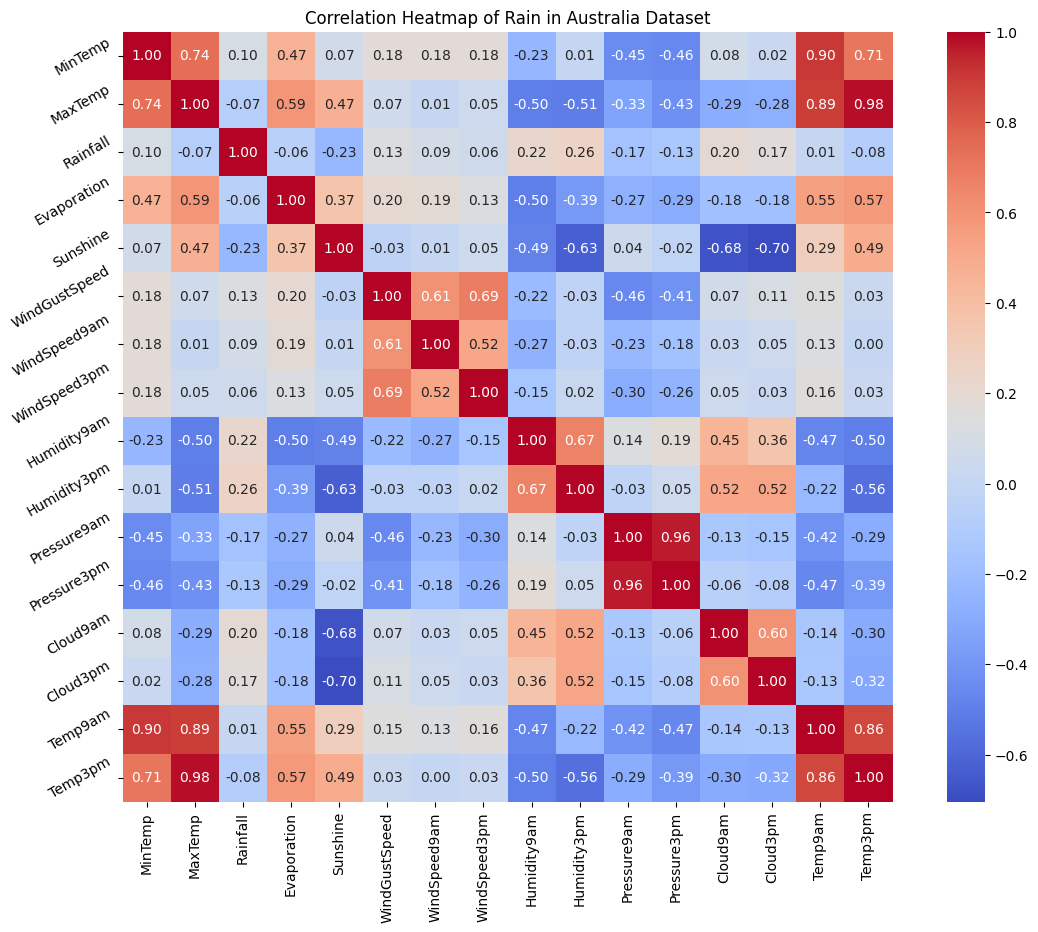

In [11]:
correlation = df.select_dtypes(['float'], ['int']).corr()


plt.figure(figsize=(14,10))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white', cmap='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

Here, we observe in the Correlation heat map that the MinTemp variable demonstrates a 
high positive correlation with MaxTemp (correlation coefficient = 0.74), 
Temp3pm (correlation coefficient = 0.71), and Temp9am (correlation coefficient = 0.90). 
Furthermore, MaxTemp also exhibits strong positive correlations with Temp9am 
(correlation coefficient = 0.89) and Temp3pm (correlation coefficient = 0.98). 
Similarly, WindGustSpeed is highly positively correlated with WindSpeed3pm 
(correlation coefficient = 0.69), while Pressure9am correlates strongly with Pressure3pm 
(correlation coefficient = 0.96). 
Moreover, Temp9am and Temp3pm display a strong positive correlation (correlation 
coefficient = 0.86). 

# Exploratory data analysis

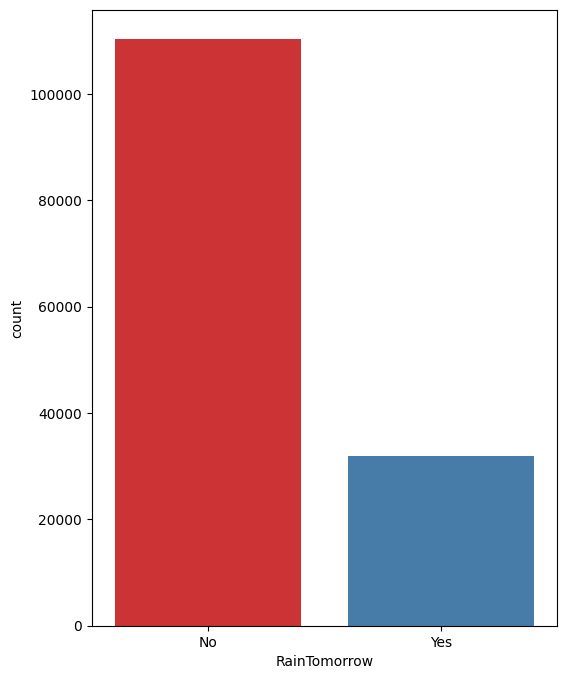

In [12]:
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=df ,palette="Set1")
plt.show()



. This graph shows the distribution of rain events. 
It appears that it rains more often than it does not rain, based on the height of the 'yes' 
bar compared to the 'no' bar. 

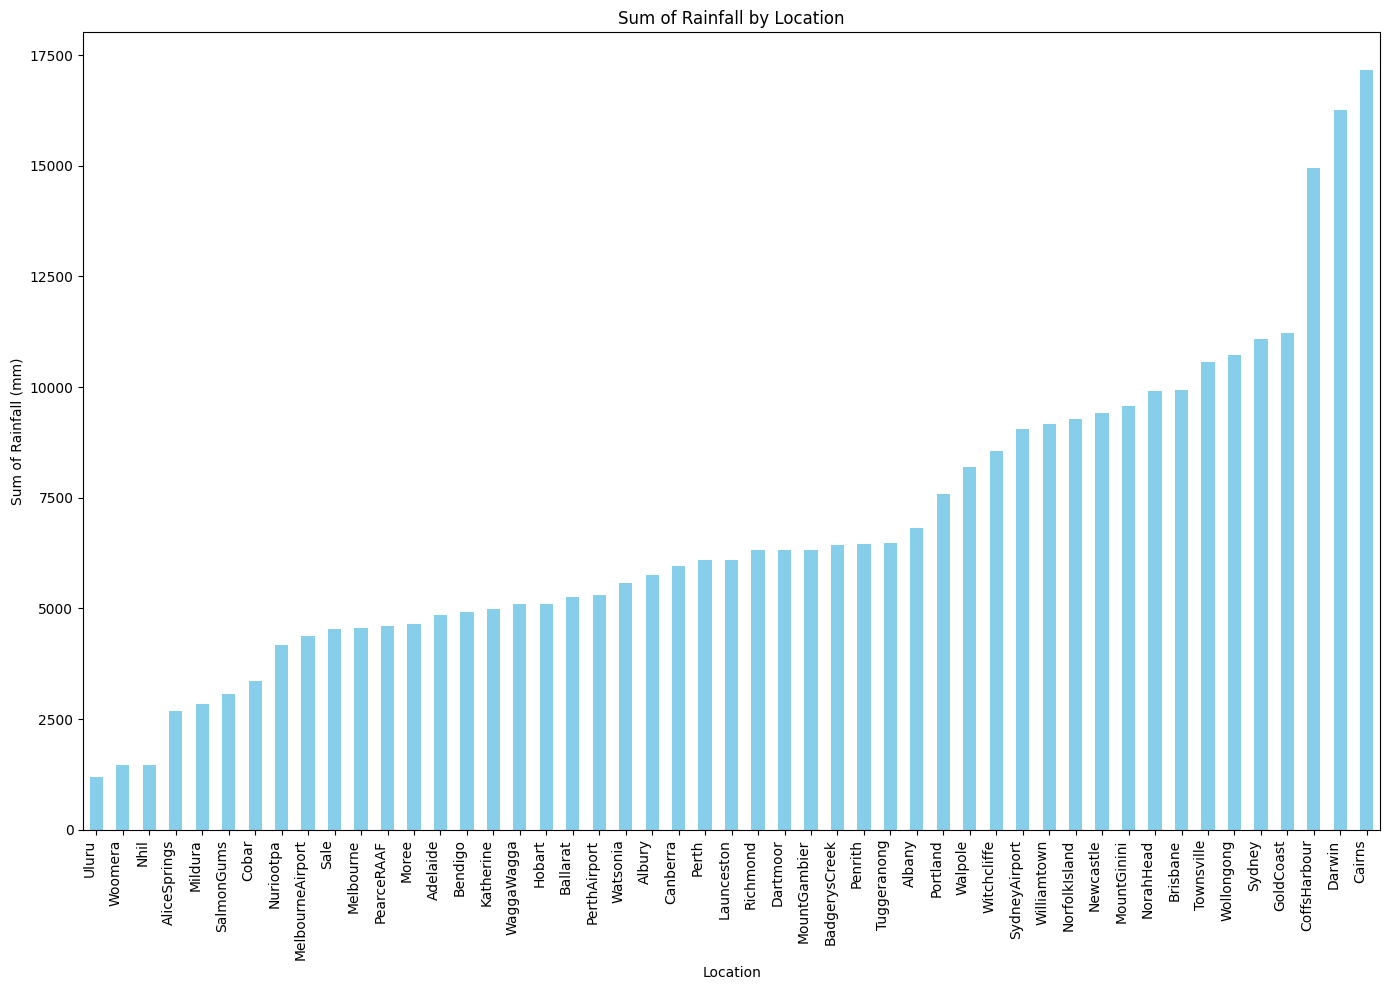

In [13]:
rainfall_by_location = df.groupby('Location')['Rainfall'].sum().sort_values()

plt.figure(figsize=(14, 10))
rainfall_by_location.plot(kind='bar', color='skyblue')  # Change color to sky blue
plt.title('Sum of Rainfall by Location')
plt.xlabel('Location')
plt.ylabel('Sum of Rainfall (mm)')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


The graph shows the total amount of rainfall recorded at various locations in Australia. 

The locations with the lowest rainfalls are: 

Uluru (17,500 mm) 

Woomera (15,000 mm) 

Nhil (12,500 mm) 

The locations with the highest rainfalls are: 

Darwin (2,500 mm) 

Cairns (2,500 mm) 

Brisbane (2,500 mm)

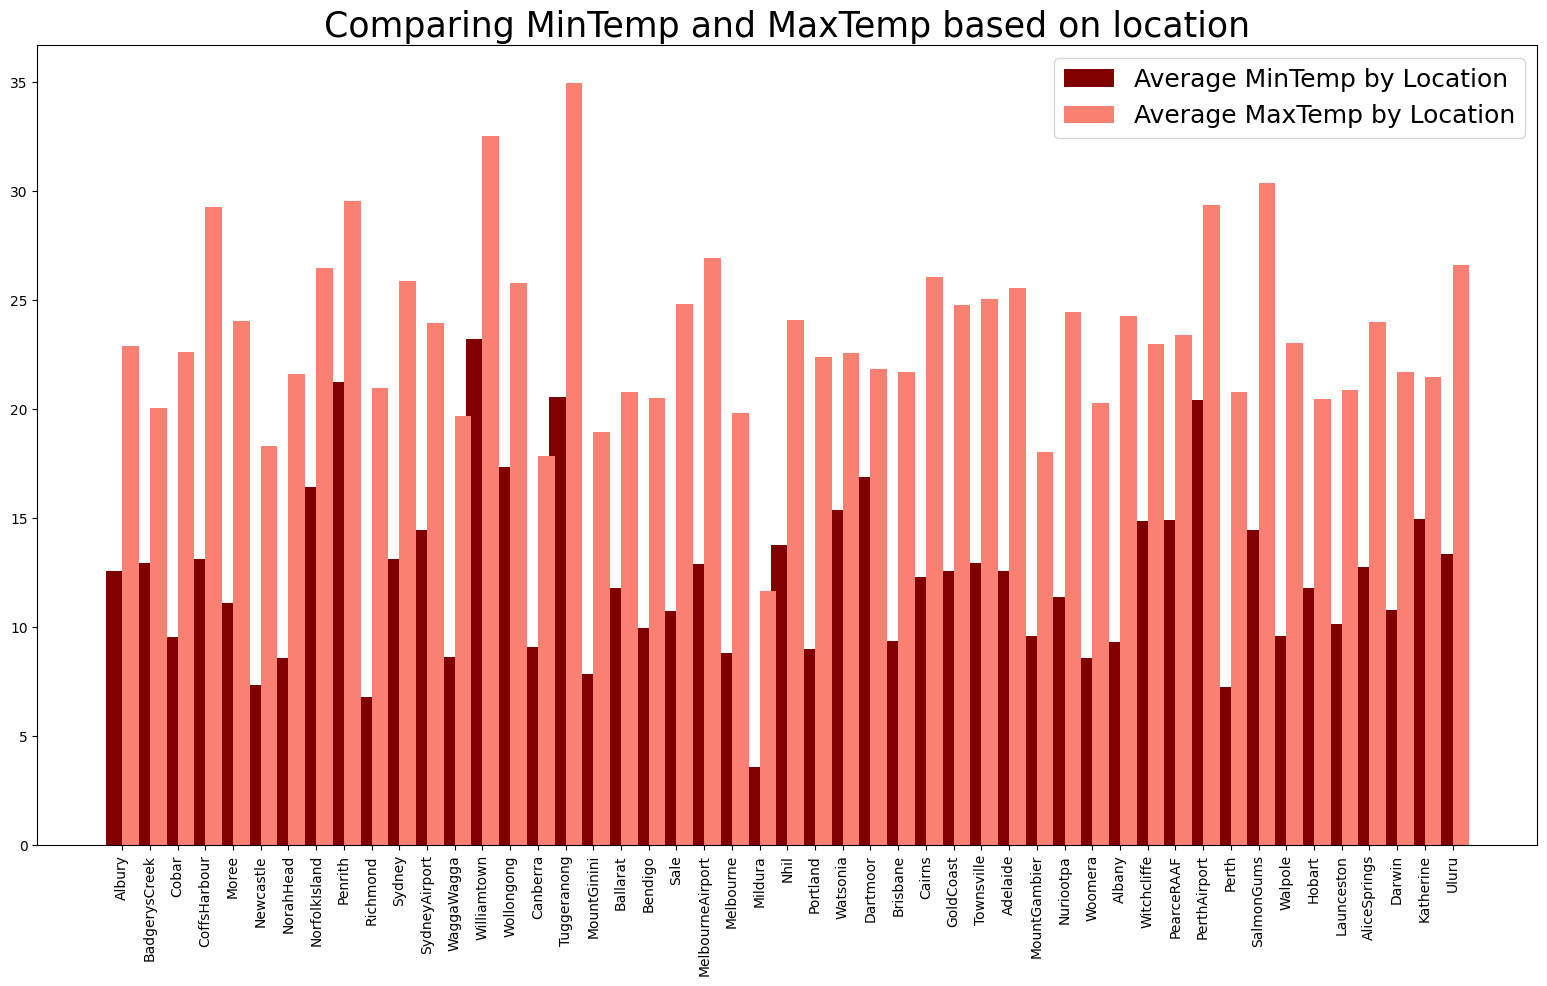

In [14]:
a = df.groupby('Location').agg({'MinTemp':'mean'})
c = df.groupby('Location').agg({'MaxTemp':'mean'})
plt.rcParams["figure.figsize"] = (15,8)

n = df['Location'].nunique()
x = np.arange(n)

loc = df['Location'].unique()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
w = 0.6

ax.bar(x-w/2, a[:]['MinTemp'], label='Average MinTemp by Location', color='maroon', width=w)
ax.bar(x+w/2, c[:]['MaxTemp'], label='Average MaxTemp by Location', color='salmon', width=w)

ax.set_xticks(x)
ax.set_xticklabels(loc, rotation=90)
plt.title("Comparing MinTemp and MaxTemp based on location", fontsize=25)
plt.legend(fontsize=18)

The bar chart presented herein depicts a comparative analysis between the variables 
'MinTemp' and 'MaxTemp' across multiple cities.

This visual representation facilitates a detailed examination of the temperature 
disparities and similarities among these locations.

By scrutinizing the data portrayed in the chart, one can discern notable variations in 
temperature patterns across diverse geographical regions.

Such a comparison enables a comprehensive understanding of the relationship between 
'MinTemp' and 'MaxTemp' within various city climates. 

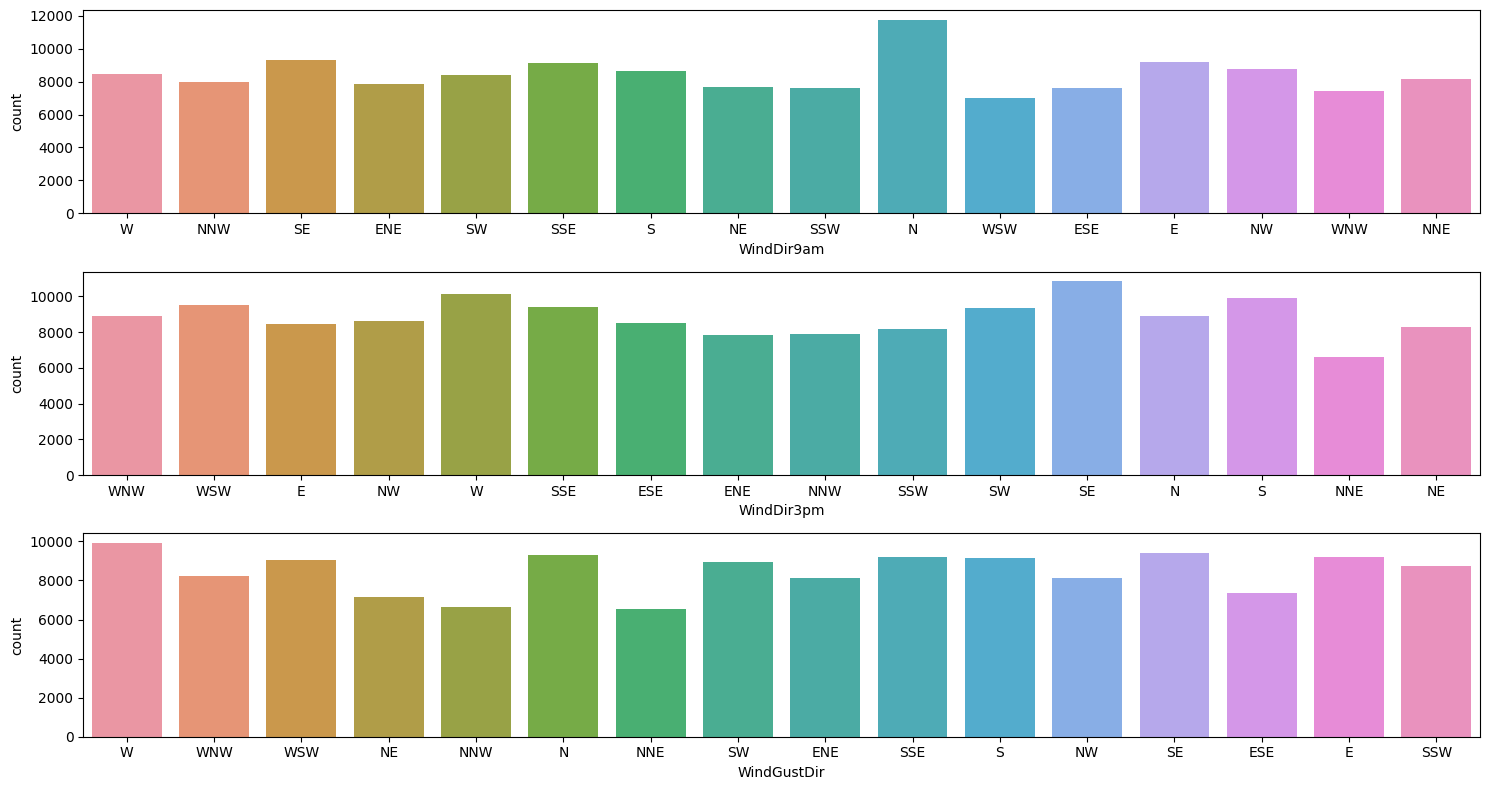

<Figure size 2500x1000 with 0 Axes>

In [15]:
fig, ax =plt.subplots(3,1)
plt.figure(figsize=(25,10))

sns.countplot(data=df,x='WindDir9am',ax=ax[0])
sns.countplot(data=df,x='WindDir3pm',ax=ax[1])
sns.countplot(data=df,x='WindGustDir',ax=ax[2])
fig.tight_layout()

The provided count plot illustrates the distribution of wind direction at both 3 pm and 9 
am, as well as highlights the prevailing wind direction. It is evident from the analysis that 
at 9 am, the majority of the wind is directed towards the north. Conversely, at 3 pm, 
predominant wind directions include south-east and west. Furthermore, upon closer 
examination, it is observed that the strongest wind gusts originate from the west, north, 
and south-east directions, respectively. This observation emphasizes the variability in 
wind patterns throughout the observed periods, with notable differences in direction and 
intensity.

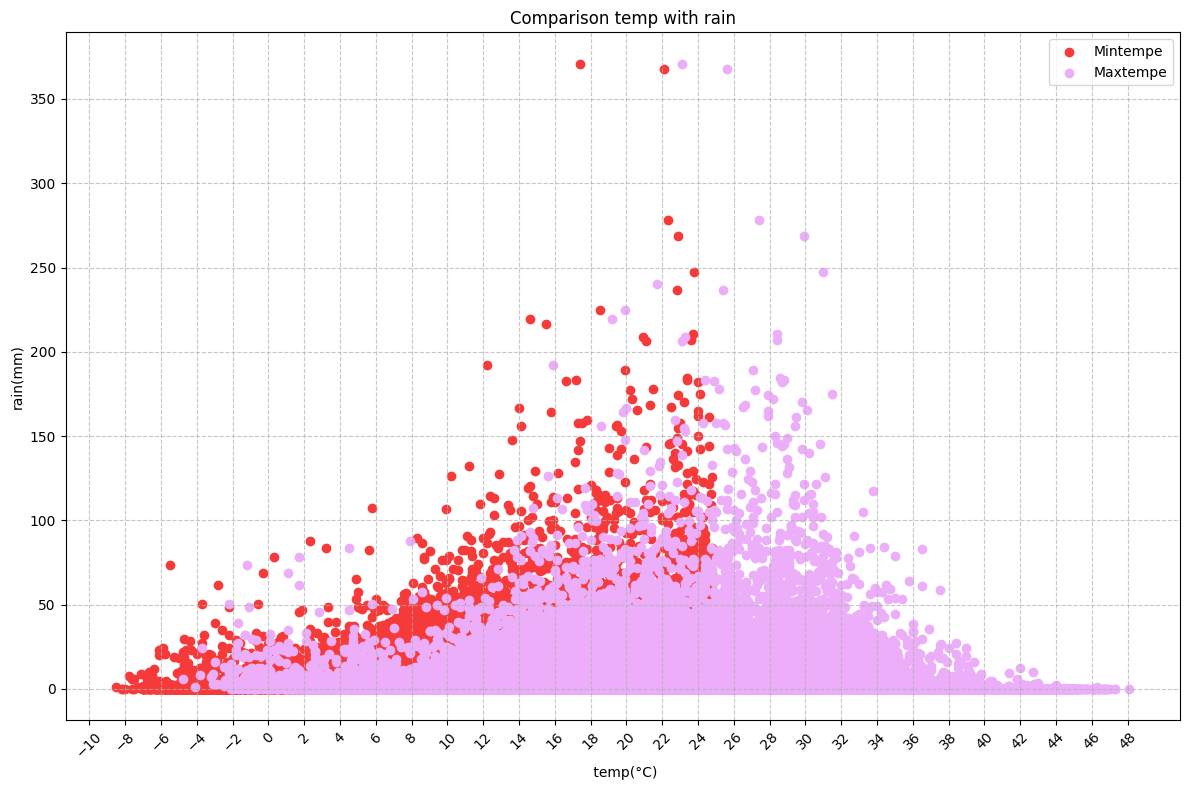

In [16]:
## Simultaneous checking of the minimum and the temperature value in the form of scatter
plt.figure(figsize=(12,8))
plt.scatter (df['MinTemp'], df["Rainfall"],color ="#F63A3A")
plt.scatter (df['MaxTemp'], df["Rainfall"],color ="#ECADF9")
plt.title('Comparison temp with rain')
plt.xlabel(' temp(°C)')
plt.ylabel('rain(mm)')
plt.xticks(range(-10,50,2), rotation = 45)
plt.legend(['Mintempe','Maxtempe'],loc = 'best')
plt.grid(True, linestyle='--', alpha=0.7)  # Add grid lines with transparency
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In this scatter plot, the distribution of rainfall is depicted, revealing that the majority of 
rainfall occurrences fall within the range of 10 to 32 degrees Celsius. Furthermore, it is 
notable that temperatures exceeding 38 degrees Celsius or dropping below 9 degrees 
Celsius correspond to the least amount of rainfall. This observation underscores the 
relationship between temperature fluctuations and rainfall patterns, suggesting that 
moderate temperatures are conducive to higher levels of precipitation while extreme 
temperatures are associated with decreased rainfall. Such insights into the interplay 
between temperature and rainfall can provide valuable information for understanding local 
climate dynamics and inform decision-making processes in various sectors, including 
agriculture, water resource management, and urban planning. 

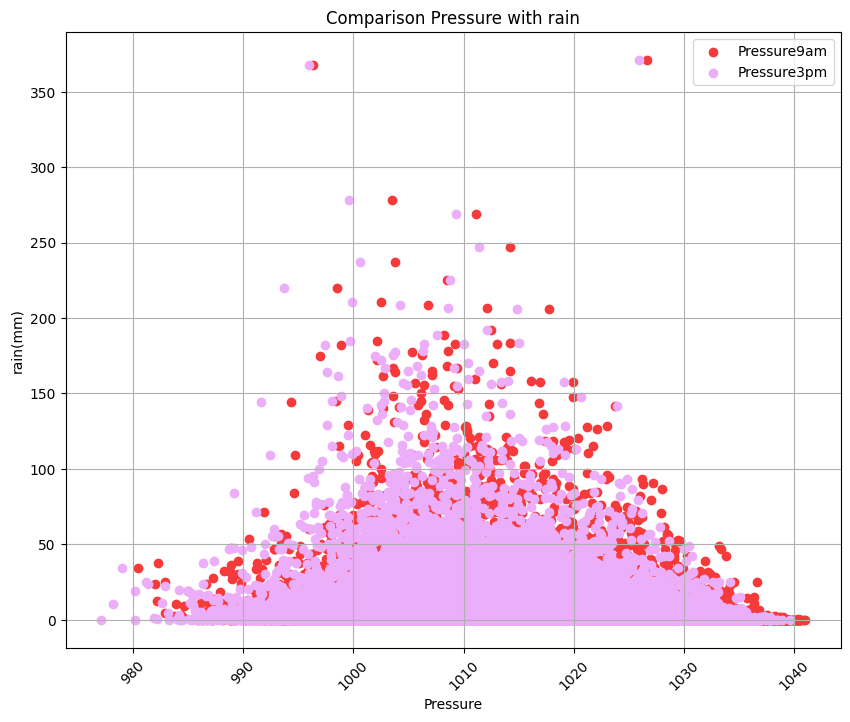

In [17]:
#Pressure at 9 am and 3 pm 
plt.figure(figsize=(10,8))
plt.scatter (df['Pressure9am'], df["Rainfall"],color ="#F63A3A")
plt.scatter (df['Pressure3pm'], df["Rainfall"],color ="#ECADF9")
plt.title("Comparison Pressure with rain")
plt.xlabel('Pressure')
plt.ylabel('rain(mm)')
plt.xticks(rotation = 45)
plt.legend(['Pressure9am','Pressure3pm'],loc = 'best')
plt.grid()
#plt.savefig("D:\IMT\dataset/Pressure9and3.png")
plt.show()

The scatter plot presented offers insights into the relationship between pressure readings 
at 9 am and 3 pm, alongside rainfall distribution. Notably, a predominant concentration of 
rainfall occurrences falls within the pressure range of 995 to 1030 hectopascals. 
Conversely, minimal rainfall is observed when pressure readings surpass 1030 
hectopascals or dip below 990 hectopascals. This observation underscores the correlation 
between atmospheric pressure and rainfall patterns. Regions experiencing moderate 
pressure levels tend to exhibit higher levels of precipitation, while extremes in pressure 
correspond to reduced rainfall. Understanding these dynamics can contribute significantly 
to meteorological forecasting and climate modeling efforts, facilitating better-informed 
decisions across various sectors reliant on accurate weather predictions. 

In [18]:
###Comparison Temp and Rain fall
fig = px.scatter(df, x='Temp9am', y='Temp3pm', color='Rainfall',
                
                 hover_data=['Temp9am', 'Temp3pm', 'Rainfall'])

fig.update_layout(
    title="Comparison Temp and Rain fall")

fig.show()

The scatter plot depicts the relationship between temperature and rainfall, revealing a 
weak positive correlation. This indicates that as temperatures increase, rainfall tends to 
rise as well. The plot resembles a heatmap, highlighting areas of elevated rainfall 
concentration. These insights aid in understanding regional climate dynamics and 
informing decision-making in sectors like agriculture and disaster preparedness. 

In [19]:
###Comparison Pressure and Rain fall
fig = px.scatter(df, x='Pressure9am', y='Pressure3pm', color='Rainfall',
                
                 hover_data=['Pressure9am', 'Pressure3pm', 'Rainfall'])

fig.update_layout(
    title="Comparison Pressure and Rain fall")

fig.show()

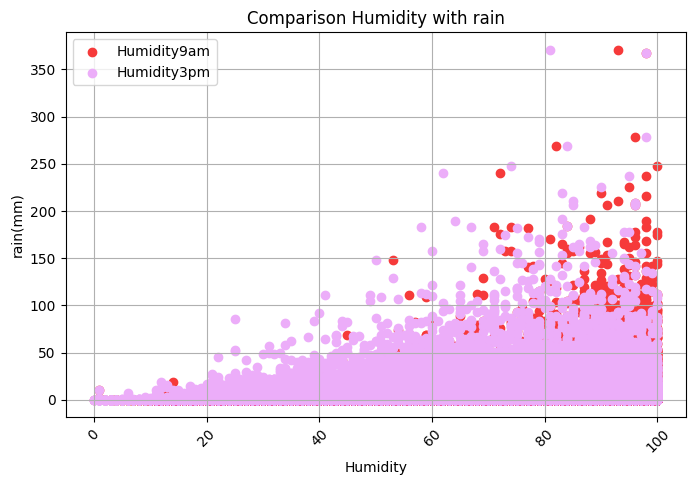

In [20]:
#Humidity  at 9 am and 3 pm
plt.figure(figsize=(8,5))
plt.scatter (df['Humidity9am'], df["Rainfall"],color ="#F63A3A")
plt.scatter (df['Humidity3pm'], df["Rainfall"],color ="#ECADF9")
plt.title("Comparison Humidity with rain")
plt.xlabel('Humidity')
plt.ylabel('rain(mm)')
plt.xticks(rotation = 45)
plt.legend(['Humidity9am','Humidity3pm'],loc = 'best')
plt.grid()
#plt.savefig("D:\IMT\dataset/Humidity9and3.png")

plt.show()

The scatter plot illustrates a clear correlation between humidity levels and rainfall. Rainfall 
is notably higher when humidity exceeds 70%, while it decreases significantly below 45% 
humidity. Understanding this relationship is crucial for various sectors, such as agriculture 
and urban planning, enabling better decision-making to manage risks associated with 
rainfall patterns and enhance resilience to changing climatic conditions.

# Data Preprocessing and feature Engineering

In [21]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d", utc=True)


df['Date']

0        2008-12-01 00:00:00+00:00
1        2008-12-02 00:00:00+00:00
2        2008-12-03 00:00:00+00:00
3        2008-12-04 00:00:00+00:00
4        2008-12-05 00:00:00+00:00
                    ...           
145455   2017-06-21 00:00:00+00:00
145456   2017-06-22 00:00:00+00:00
145457   2017-06-23 00:00:00+00:00
145458   2017-06-24 00:00:00+00:00
145459   2017-06-25 00:00:00+00:00
Name: Date, Length: 145460, dtype: datetime64[ns, UTC]

In [22]:
###Separating the year, month, day and hour values and storing each in a separate column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [23]:
#### Definition of functions to convert month to season
def get_season(month):
    if month in [12, 1, 2]:
        return 'winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'autumn'

###Apply the function on the month column and create the season column 
df['Season'] = df['Month'].apply(get_season)

To improve visualization and gain deeper insights, I divided the date column into separate 
components: Year, Month, Day, and Season. This segmentation allows for a more detailed 
analysis of temporal patterns, particularly across different seasons. Subsequently, I 
removed the original Date column to streamline further analysis. This approach enhances 
the clarity of visualizations and facilitates a more focused exploration of seasonal trends, 
thereby bolstering the robustness of subsequent analyses and insights derived from the 
dataset. 

In [24]:
#
df.drop('Date', axis=1, inplace = True)

In [25]:
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Cloud9am  Cloud3pm  Temp9am  \
0           44.0          W        WNW  ...       8.0       NaN     16.9   
1           44.0        NNW        WSW  ...       NaN       NaN     17.2   
2           46.0          W        WSW  ...       NaN       2.0     21.0   
3           24.0         SE          E  ...       NaN       NaN     18.1   
4           41.0        ENE         NW  ...       7.0       8.0     17.8   

   Temp3pm  RainToday  RainTomorrow  Year  Month  Day  Season  
0     21.8         No            No  2008     12    1  winter  
1     24.3         No            No  2008     12    2  winter  
2     23.2         No            No  2008     12    3  winter  
3     26.5         No            No  2008     12    4  winter  
4     29.7         No            No  2008     12    5  winter  

[5 rows x 26 columns]

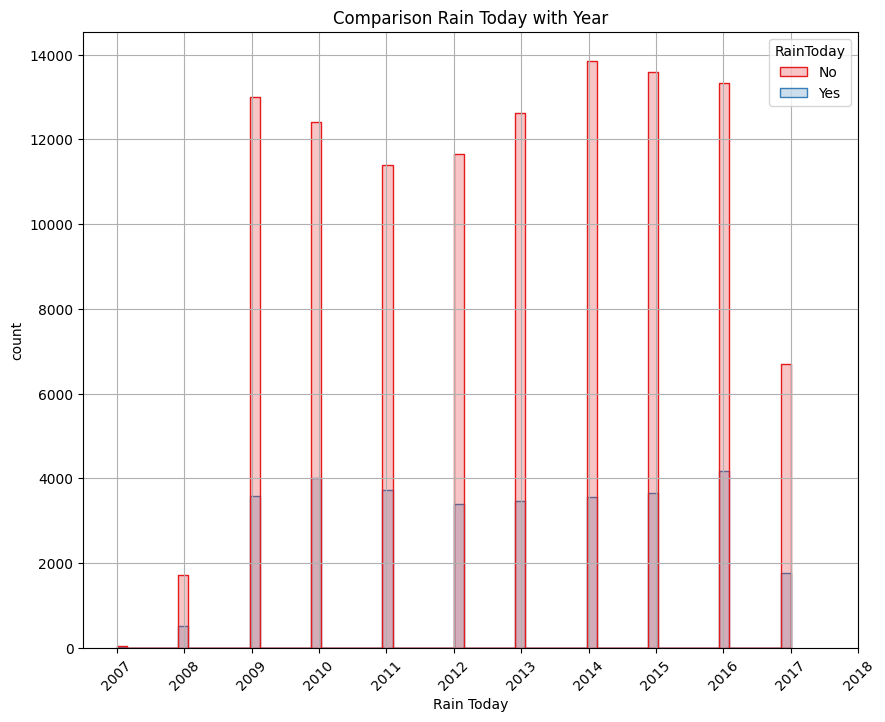

In [26]:
####count RainToday & Year
plt.figure (figsize=(10,8))
sns.histplot(x= "Year", hue = "RainToday",data =df, palette ="Set1",element ="step",common_norm=False)
plt.grid()
plt.title("Comparison Rain Today with Year")
plt.xlabel("Rain Today" )
plt.ylabel("count")
plt.xticks(range(2007,2019,1), rotation = 45)
plt.show()

Most of the time, rainfall is absent, as depicted by the bar chart illustrating the distribution 
of rainfall between the years 2007 and 2018. Each bar in the chart is color-coded to 
indicate the count of rainy and non-rainy days within that year. This visualization offers 
valuable insights into the frequency and distribution of rainfall over the specified period, 
facilitating a clearer understanding of precipitation patterns throughout the years analyzed. 

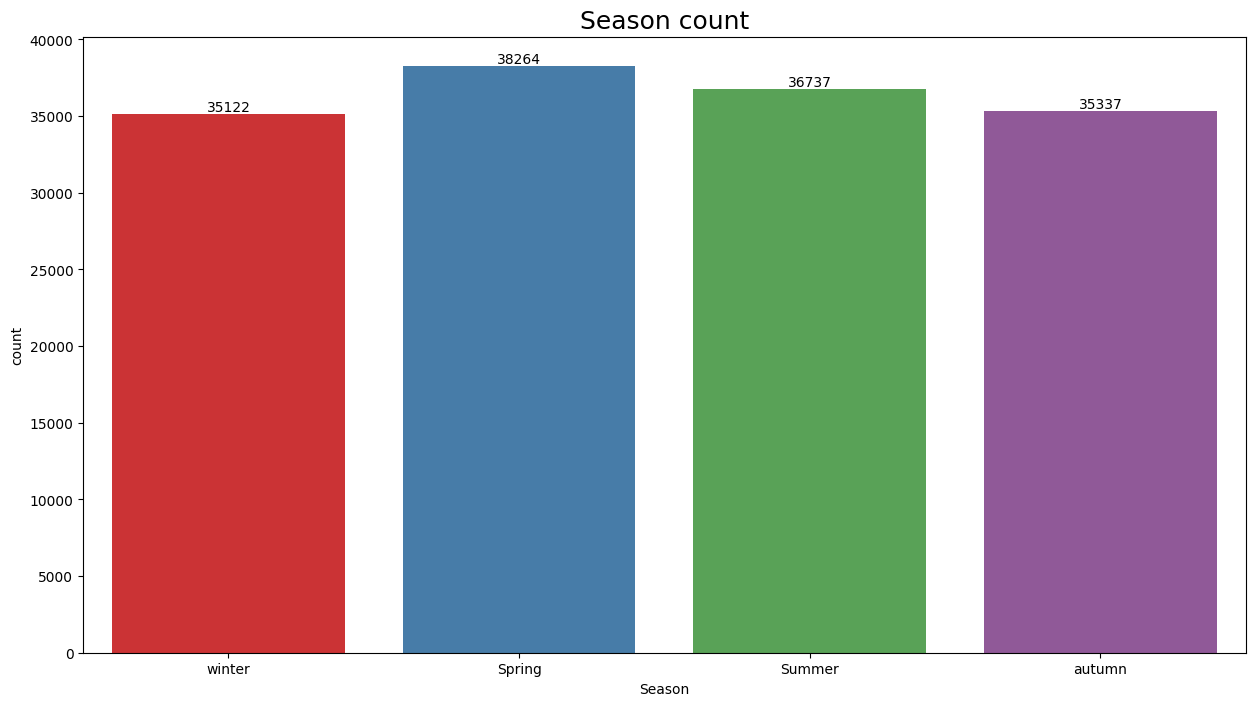

In [27]:
###count Season
ax = sns.countplot(x ='Season',data=df,palette='Set1')
ax.bar_label(ax.containers[0]) 
plt.title('Season count', fontsize=18)
plt.show()

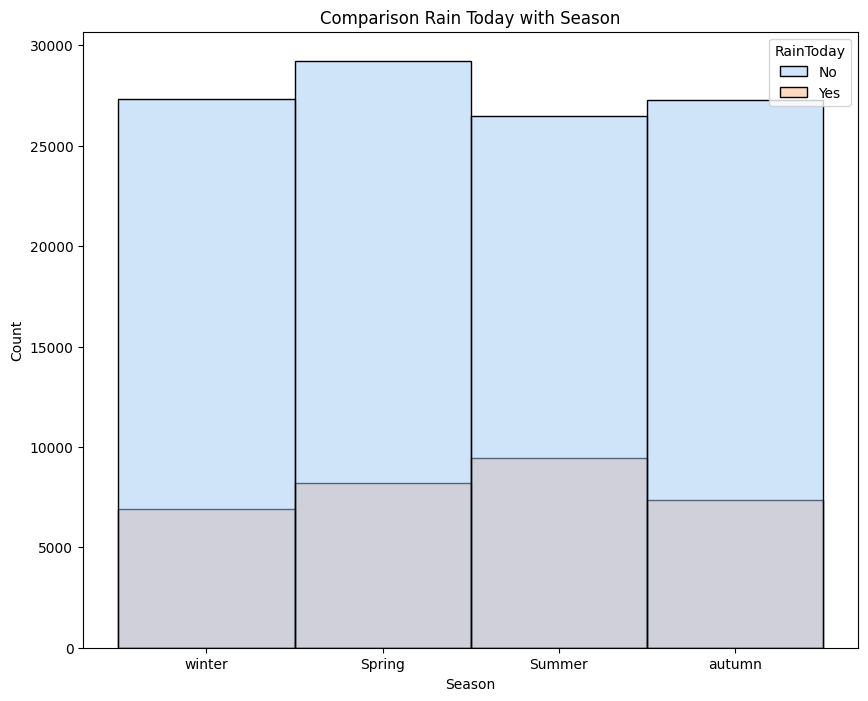

In [28]:
##count  per month 
plt.figure(figsize=(10,8))
sns.histplot(data=df, x = 'Season', hue = 'RainToday', palette = 'pastel')
plt.title("Comparison Rain Today with Season")

plt.show()

The histogram plot reveals a surprising trend where the majority of rainy days occur during 
summer and spring, while winter records the least rainfall. This observation could be 
attributed to specific weather conditions prevalent in Australia, influenced by factors such 
as humidity and temperature, as demonstrated in the preceding chart. Given these 
f
 indings, such results were expected, indicating a correlation between seasonal variations 
and rainfall patterns, further underscoring the significance of local climate dynamics in 
shaping precipitation trends. 

In [29]:
df["Rained"] = df["Rainfall"] > 0

df["NotRained"] = df["Rainfall"] <= 0

# Group the data by year and calculate the number of rainy and non-rainy days
rain_counts = df.groupby("Year")[["Rained"]].sum()
NotRain_counts = df.groupby("Year")[["NotRained"]].sum()

# Print the results
print(rain_counts)
print(NotRain_counts)

      Rained
Year        
2007      28
2008     822
2009    5731
2010    6338
2011    5913
2012    5503
2013    5585
2014    5823
2015    5967
2016    6532
2017    2877
      NotRained
Year           
2007         33
2008       1423
2009      10863
2010      10084
2011       9212
2012       9540
2013      10514
2014      11575
2015      11265
2016      10977
2017       5594


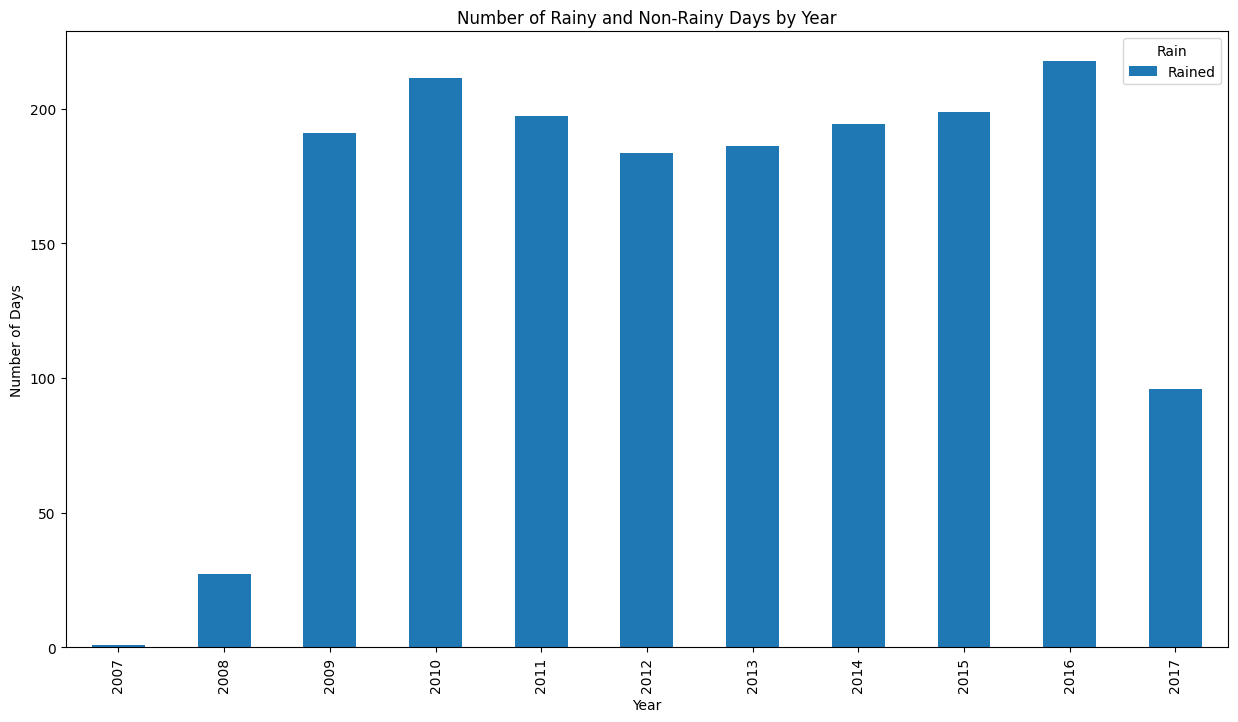

In [30]:
# Create a bar chart to visualize the results
rain_counts = rain_counts / 30
rain_counts.plot(kind="bar", stacked=True)
plt.xlabel("Year")
plt.ylabel("Number of Days")
plt.title("Number of Rainy and Non-Rainy Days by Year")
plt.legend(title="Rain")
plt.show()

# Engineering Outliers

In [31]:
df.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm           Year  \
count  89572.000000  86102.000000  143693.000000  141851.00000  145460.000000   
mean       4.447461      4.509930      16.990631      21.68339    2012.769751   
std        2.887159      2.720357       6.488753       6.93665       2.537684   
min        0.000000      0.000000      -7.200000      -5.40000    2007.000000   
25%        1.000000      2.000000      12.300000      16.60000    2011.000000   
50%        5.000000      5.000000      16.700000      21.10000    2013.000000   
75%        7.000000      7.000000      21.600000      26.40000    2015.000000   
max        9.000000      9.000000      40.200000      46.70000    2017.000000   

               Month            Day  
count  145460.000000  145460.000000  
mean        6.399615      15.712258  
std         3.427262       8.794789  
min         1.000000       1.000000  
25%         3.000000       8.000000  
50%         6.000000      16.000000  
75%         9.000000      23.000000  
max        12.000000      31.000000

Upon closer examination, it becomes apparent that the Rainfall, Evaporation, 
WindSpeed9am, and WindSpeed3pm columns may contain outliers. This suspicion arises 
from the significant disparity between their 75th percentile values and their respective 
maximum values. To visualize and identify these outliers effectively, I will draw boxplots for 
the aforementioned variables. 

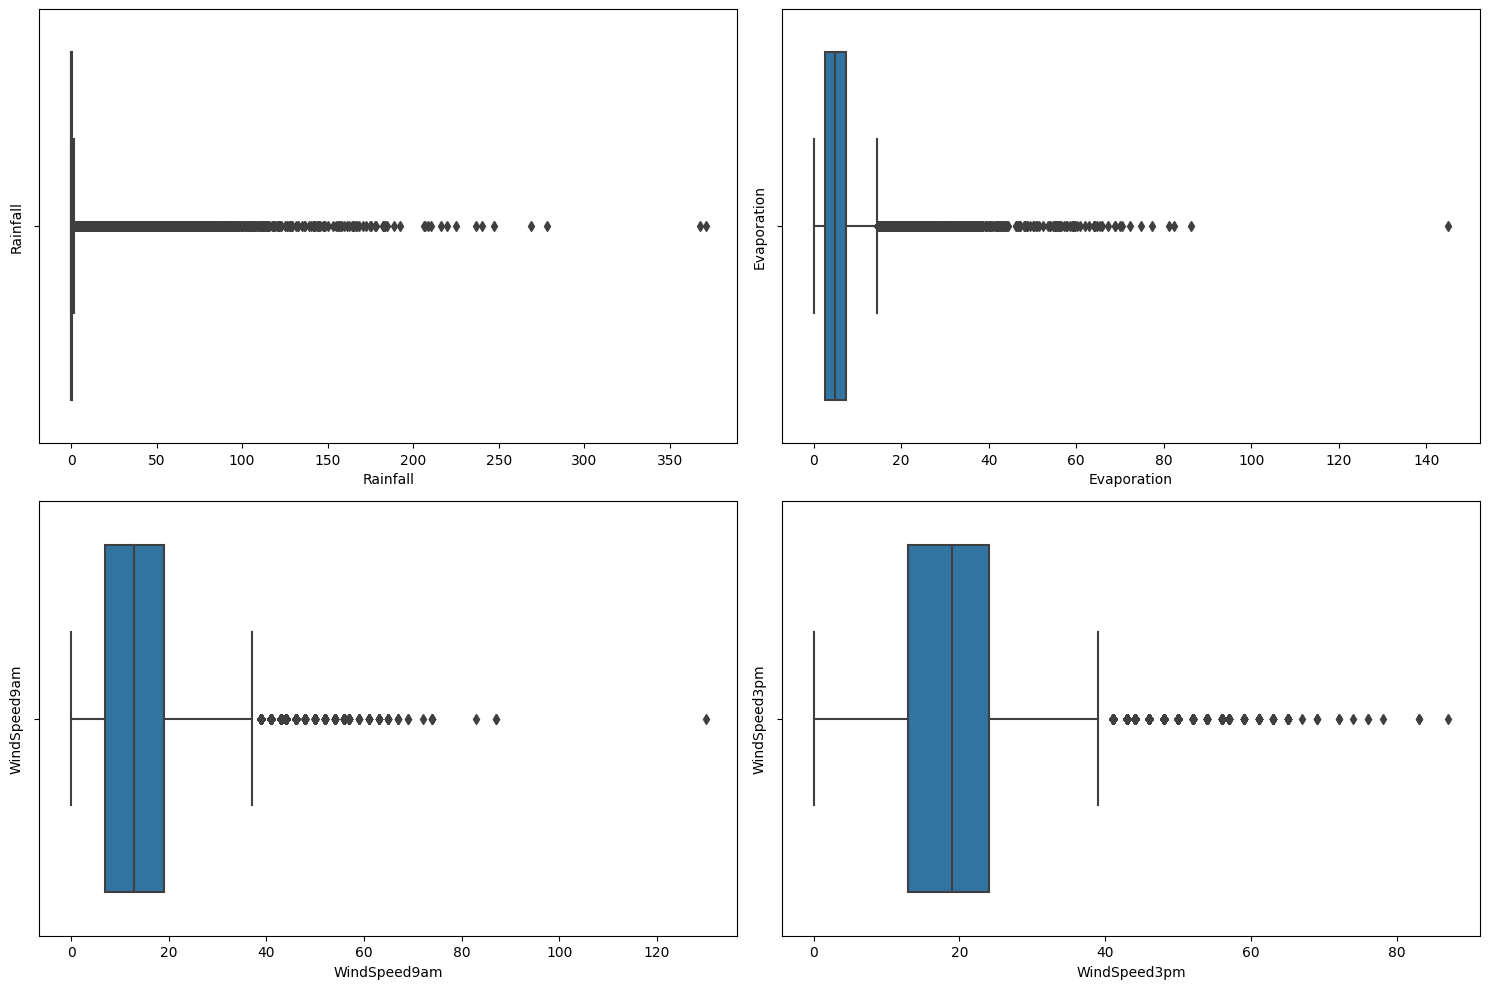

In [32]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='Rainfall')
plt.title('')
plt.ylabel('Rainfall')

plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='Evaporation')
plt.title('')
plt.ylabel('Evaporation')

plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='WindSpeed9am')
plt.title('')
plt.ylabel('WindSpeed9am')

plt.subplot(2, 2, 4)
sns.boxplot(data=df, x='WindSpeed3pm')
plt.title('')
plt.ylabel('WindSpeed3pm')



plt.tight_layout()
plt.show()


The boxplots above confirm the presence of numerous outliers in these variables. 
Examining Variable Distributions 
Next, I will plot histograms to assess the distributions and determine whether they are 
normal or skewed. If a variable follows a normal distribution, I will conduct Extreme Value 
Analysis. However, if the distributions are skewed, I will calculate the Interquartile Range 
(IQR). 

Text(0.5, 1.0, 'WindSpeed9am')

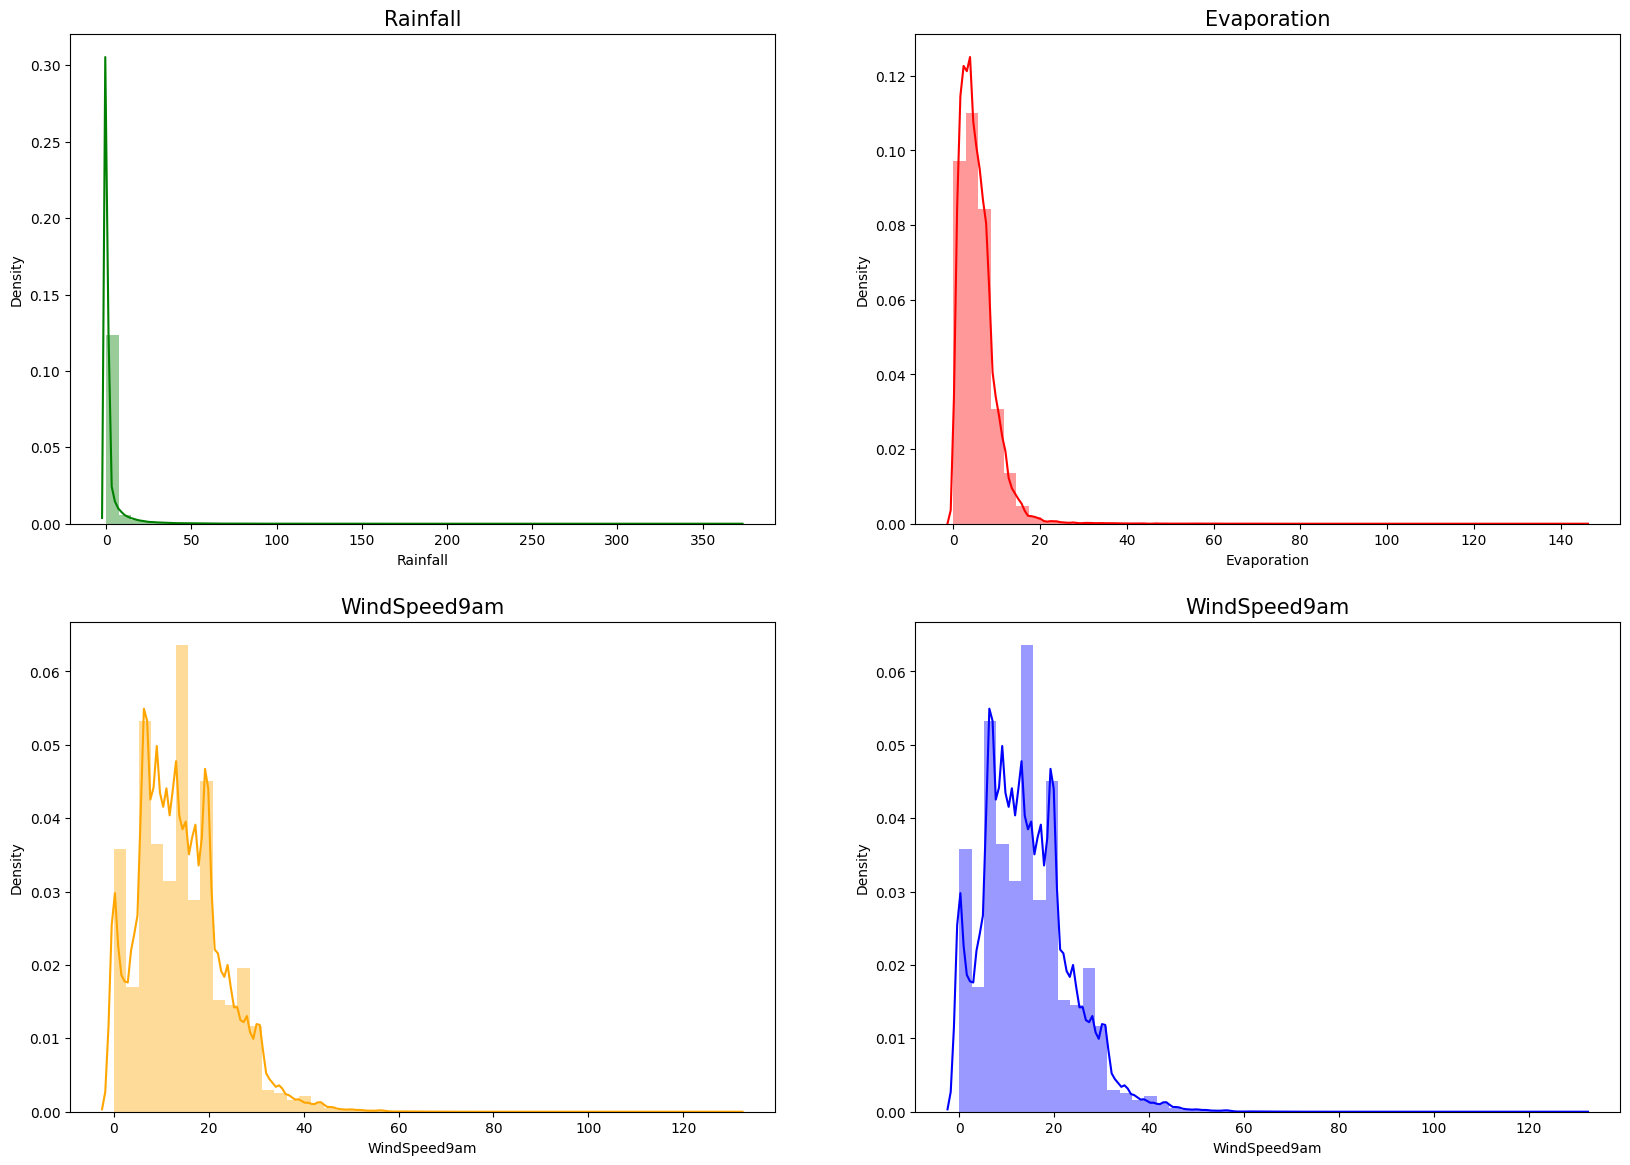

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(20,14))

# Rainfall
sns.distplot(df['Rainfall'], ax=ax[0,0], color='green')
ax[0,0].set_title("Rainfall", fontsize=15)

# Evaporation
sns.distplot(df['Evaporation'], ax=ax[0,1], color='red')
ax[0,1].set_title("Evaporation", fontsize=15)

# WindSpeed9am
sns.distplot(df['WindSpeed9am'], ax=ax[1,0], color='orange')
ax[1,0].set_title("WindSpeed9am", fontsize=15)

# WindSpeed9am
sns.distplot(df['WindSpeed9am'], ax=ax[1,1], color='blue')
ax[1,1].set_title("WindSpeed9am", fontsize=15)

It is evident that all four variables exhibit skewness. Therefore, I will utilize the Interquartile 
Range (IQR) method to identify outliers.

(IQR) method is: 

Lower Fence = Q1 – (IQR * K) 
Upper Fence = Q3 – (IQR * k) 

Where: 

Q1 is the first quartile (25th percentile) 
Q3 is the third quartile (75th percentile) 
IQR is the Interquartile Range, calculated as Q3 – Q1 

K is a constant multiplier that determines how far the fences are from the quartiles, which I 
determine here as 3 

And we consider the amount bigger than Upper Fence and lower than Lower Fence as 
outliers. 

******
We have observed outliers in the Rainfall, Evaporation, WindSpeed9am, and 
WindSpeed3pm columns. To address this issue.

In [34]:
# find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -2.4000000000000004 or > 3.2


For Rainfall, the minimum and maximum values are 0.0 and 371.0. So, the outliers are values > 3.2.

In [35]:
# find outliers for Evaporation variable

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004


In [36]:
# find outliers for WindSpeed9am variable

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed9am outliers are values < -29.0 or > 55.0


In [37]:
# find outliers for WindSpeed3pm variable

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed3pm outliers are values < -20.0 or > 57.0


I will employ a top-coding approach to cap 
the maximum values and subsequently remove outliers from these variables.

# Engineering outliers in numerical variables

In [38]:
df1 = df.copy()

In [39]:
def max_value(df1, variable, top):
    return np.where(df1[variable] > top, top, df1[variable])

df1['Rainfall'] = max_value(df1, 'Rainfall', 3.2)
df1['Evaporation'] = max_value(df1, 'Evaporation', 21.8)
df1['WindSpeed9am'] = max_value(df1, 'WindSpeed9am', 55)
df1['WindSpeed3pm'] = max_value(df1, 'WindSpeed3pm', 57)

# Handling Missing values

In [40]:
data_type = pd.DataFrame(df1.dtypes , columns = ["Data Types"])
count_nulls = pd.DataFrame(df1.isnull().sum(), columns = ["Nulls Count"])

dfNull = pd.concat([data_type, count_nulls], axis = 'columns')
dfNull

Data Types  Nulls Count
Location          object            0
MinTemp          float64         1485
MaxTemp          float64         1261
Rainfall         float64         3261
Evaporation      float64        62790
Sunshine         float64        69835
WindGustDir       object        10326
WindGustSpeed    float64        10263
WindDir9am        object        10566
WindDir3pm        object         4228
WindSpeed9am     float64         1767
WindSpeed3pm     float64         3062
Humidity9am      float64         2654
Humidity3pm      float64         4507
Pressure9am      float64        15065
Pressure3pm      float64        15028
Cloud9am         float64        55888
Cloud3pm         float64        59358
Temp9am          float64         1767
Temp3pm          float64         3609
RainToday         object         3261
RainTomorrow      object         3267
Year               int32            0
Month              int32            0
Day                int32            0
Season            object            0
Rained              bool            0
NotRained           bool            0

I created a simple data frame to assess the extent of missing values. Subsequently, I 
developed code to determine the percentage of missing values in each variable. This 
analysis revealed the presence of missing values in both categorical and numerical 
variables. 

In [41]:
# Find the number of missing values in each column
missing_values = df1.isnull().sum()

# Calculate the total number of rows in the DataFrame
total_rows = df1.shape[0]

# Calculate the percentage of missing values for each column
percentage_missing = (missing_values / total_rows) * 100

# Print the results
print("Percentage of missing values in each column:")
percentage_missing


Percentage of missing values in each column:


Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
Year              0.000000
Month             0.000000
Day               0.000000
Season            0.000000
Rained            0.000000
NotRained         0.000000
dtype: float64

In [42]:
for col in df1.select_dtypes(['float64'], ['int']):
    df1[col] = df1[col].fillna(df1[col].median())


for col in df1.select_dtypes(['object']):
    df1[col] = df1[col].fillna(method = 'ffill')    

The optimal approach for handling missing values in this scenario involves filling 
categorical variables with their mode. The mode, representing the value that occurs most 
frequently in the dataset, is a suitable choice for categorical data imputation. For 
numerical variables, filling them with their median is preferred. The median, which denotes 
the middle value when the data is sorted, is commonly used for filling missing values. 
Unlike the mean, the median is less influenced by outliers, rendering it a more robust 
measure of central tendency, particularly in instances of skewed data or the presence of 
outliers. 

In [43]:
df1.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
Season           0
Rained           0
NotRained        0
dtype: int64

In [44]:
df1.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day',
       'Season', 'Rained', 'NotRained'],
      dtype='object')

# Encoding Numerical and Categorical variables

The optimal approach for handling missing values in this scenario involves filling 
categorical variables with their mode. The mode, representing the value that occurs most 
frequently in the dataset, is a suitable choice for categorical data imputation. For 
numerical variables, filling them with their median is preferred. The median, which denotes 
the middle value when the data is sorted, is commonly used for filling missing values. 
Unlike the mean, the median is less influenced by outliers, rendering it a more robust 
measure of central tendency, particularly in instances of skewed data or the presence of 
outliers. 

It changes our dataset like this: 

As an example of one-hot encoding, consider the categorical variable "Location" with 50 
different locations. This process creates 50 distinct columns, where a value of 1 is 
assigned to rows corresponding to each specific location, while rows not matching the 
specific location are assigned a value of 0. 

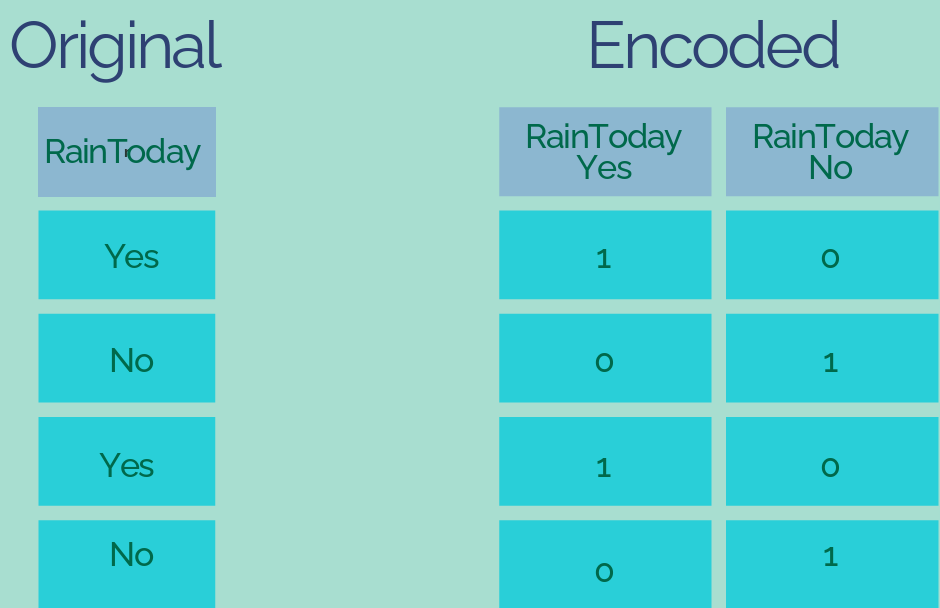

In [45]:
#one-hot encoding
# Create dummy variables for Location and concatenate with df1
df1 = pd.concat([df1, pd.get_dummies(df1['Location'], prefix='Location', drop_first=True, dtype=int)], axis=1)

In [46]:
#one-hot encoding
# Create dummy variables for WindGustDir and concatenate with df1
df1 = pd.concat([df1, pd.get_dummies(df1['WindGustDir'], prefix='WindGustDir', drop_first=True, dtype=int)], axis=1)

In [47]:
#one-hot encoding
# Create dummy variables for WindDir9am and concatenate with df1
df1 = pd.concat([df1, pd.get_dummies(df1['WindDir9am'], prefix='WindDir9am', drop_first=True, dtype=int)], axis=1)

In [48]:
#one-hot encoding
# Create dummy variables for WindDir3pm and concatenate with df1
df1 = pd.concat([df1, pd.get_dummies(df1['WindDir3pm'], prefix='WindDir3pm', drop_first=True, dtype=int)], axis=1)

In [49]:
df1['RainTomorrow'] = df1['RainTomorrow'].map({'Yes' : 1, 'No' : 0})

In [50]:
encoder = ce.BinaryEncoder(cols=['RainToday'])

df1 = encoder.fit_transform(df1)

In [51]:
df1.shape

(145460, 122)

In [52]:
# List of columns to drop
columns_to_drop = ['Year', 'Month', 'Day', 'Season', 'Rained', 'NotRained',
                   'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'Location']

# Drop the columns
df1.drop(columns=columns_to_drop, inplace=True)


# Scalling DataSet

Another crucial step in modeling our dataset involves scaling the numerical variables. This 
step is essential because our dataset comprises various numerical variables, and machine 
learning algorithms may struggle to discern the differences between them. Thus, it's 
imperative to provide the algorithm with scaled data for optimal performance. To 
accomplish this, I utilized the MinMaxScaler library to scale our dataset. 

The MinMaxScaler library

Variable is the original feature value. 

VariableMin is the minimum value of the feature in the dataset. 

VariableMax is the maximum value of the feature in the dataset. 

VariableScaled is the scaled value of the feature within the specified range.

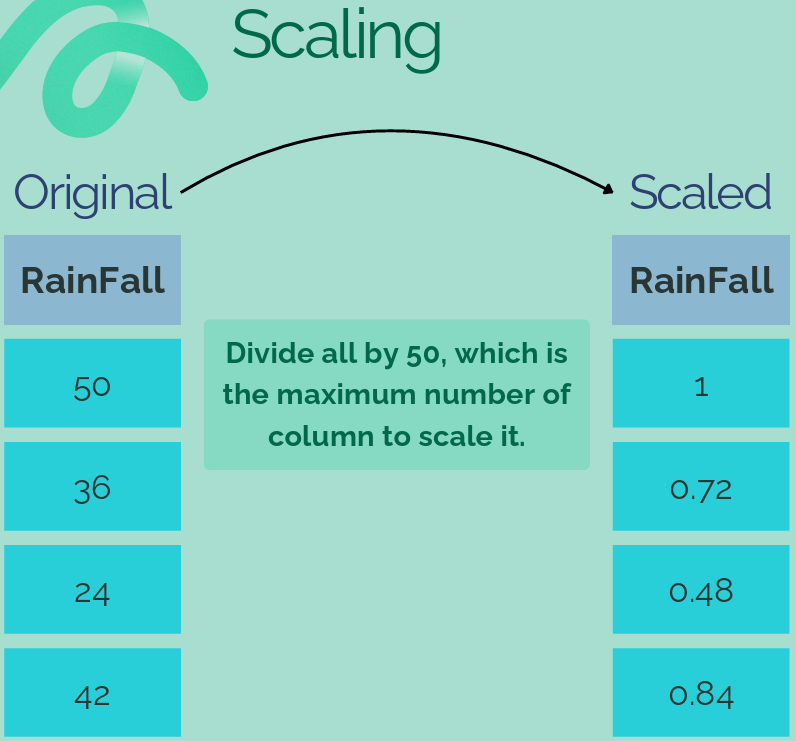

In [53]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Assuming df1 is your original DataFrame

# Fit the scaler to your data
scaler.fit(df1)

# Transform the data
scaled_df = scaler.transform(df1)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_df, columns=df1.columns)


In [54]:
#scaled_df.to_csv('output2.csv', index=False)    #for testing

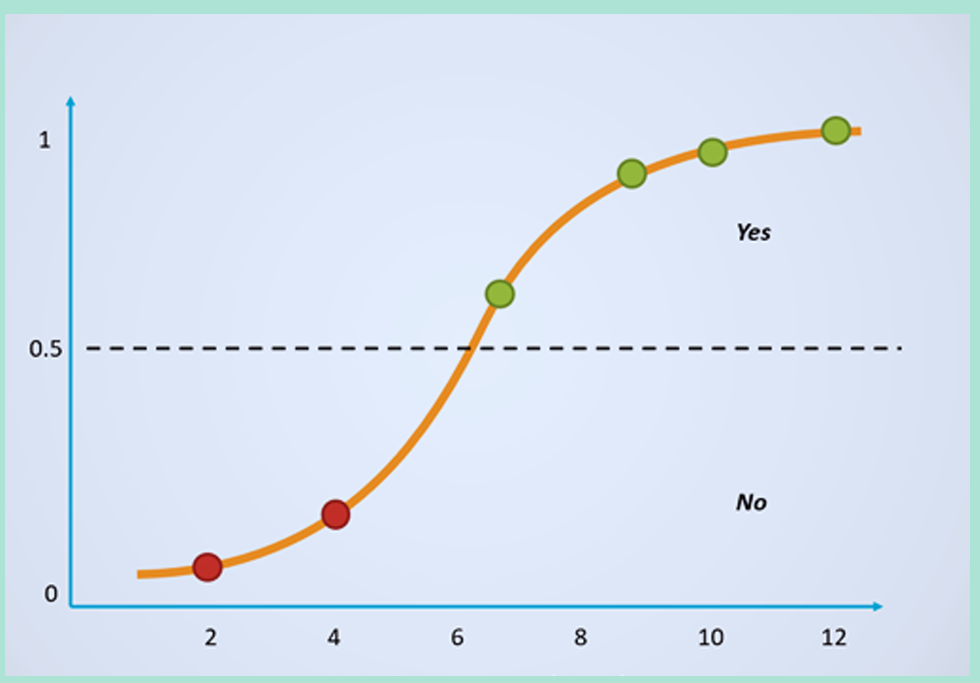

# Model Training

In [55]:
X = scaled_df.drop(['RainTomorrow'], axis=1)

y = scaled_df['RainTomorrow']

We possess two key variables: X, encompassing all features (independent variables) except 
'RainTomorrow', and y, comprising the target variable 'RainTomorrow'. Such a setup is 
standard in supervised machine learning tasks, where a dataset includes features 
alongside a target variable, and the objective is to train a model capable of predicting the 
target variable based on the features provided. 

In [56]:
# split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Here, I partitioned the dataset into training and testing sets, encompassing both features 
and the target variable. This division enables the evaluation of the machine learning 
model's performance on unseen data.

I implemented a test size of 20% of the entire dataset. This ensures that the model is 
trained on 80% of the data, leaving 20% as unseen data for testing the model's 
performance. 

In [57]:
# perform the model
LR_Model = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
LR_Model.fit(X_train, y_train)



LogisticRegression(random_state=0, solver='liblinear')

Here, I conducted the model fitting process on my training set. I opted for Logistic 
Regression, a regression analysis method utilized for predicting the probability of a binary 
outcome. I specifically selected the 'liblinear' solver from scikit-learn due to its suitability 
for small datasets and efficiency in binary classification tasks. Additionally, I set the 
random seed to 0 to ensure reproducibility of results. This parameter guarantees 
consistency in outcomes across multiple runs of the code, facilitating debugging and result 
sharing. 

# Predict results

In [58]:


y_predicted = LR_Model.predict(X_test)

y_predicted

array([0., 0., 0., ..., 1., 0., 0.])

# 0 is for probability of no rain and 1 is for probability of rain

In [59]:
LR_Model.predict_proba(X_test)[:,0]

array([0.74922574, 0.83352119, 0.82773124, ..., 0.33847814, 0.84553715,
       0.96756928])

In [60]:
LR_Model.predict_proba(X_test)[:,1]

array([0.25077426, 0.16647881, 0.17226876, ..., 0.66152186, 0.15446285,
       0.03243072])

Our model demonstrates excellent performance. The outcome is presented in an array 
format, where 0 represents the probability of no rain and 1 represents the probability of 
rain. 

# Check accuracy score

In [61]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_predicted)))

Model accuracy score: 0.8388


We observe an accuracy of approximately 83%, which signifies a highly favorable result. 
This indicates that our model performs exceptionally well, correctly predicting outcomes 
for 83% of our unseen data.

In our evaluation, y_test denotes the true labels (our unseen data), while y_predicted 
represents the predicted labels. The function compares these two sets of labels and 
computes the accuracy score using the formula outlined below. 

# Check for overfitting and underfitting

In [62]:
print('Training set score: {:.4f}'.format(LR_Model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(LR_Model.score(X_test, y_test)))

Training set score: 0.8401
Test set score: 0.8388


The training-set accuracy score is 0.8401, while the test-set accuracy is 0.8388. These two 
values are highly comparable, indicating no signs of overfitting.

For instance, if the training set accuracy were considerably higher than the test-set 
accuracy, it would suggest overfitting. Overfitting occurs when the model learns too much 
from the training data, including noise, and fails to generalize well to unseen data. 

Conversely, underfitting occurs when the model is too simplistic or inadequately trained, 
leading to its failure to capture patterns in the data and resulting in poor overall 
performance. 

# K-Fold Cross validation

In [63]:
# Perform k-fold cross-validation
scores = cross_val_score(LR_Model, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print cross-validated scores
print("Cross-validated scores:", scores)
print("Mean accuracy:", scores.mean())


Cross-validated scores: [0.8384893  0.8392627  0.8433445  0.83603317 0.8395136 ]
Mean accuracy: 0.8393286546942591


Here, we assign cv to 5, which divides our dataset into 5 parts (each comprising 20% of the 
data). In each iteration, one of these parts serves as the test set while the remaining parts 
form the training set. Calculating accuracy scores for these 5 partitions provides us with a 
comprehensive understanding and ultimately yields our final accuracy. 

Cross-validation serves as a robust method for evaluating, tuning, and selecting models in 
machine learning. It enhances generalization and ensures more reliable predictions on 
unseen data, contributing to the overall robustness of our model. 

# Confusion matrix

A confusion matrix serves as a valuable tool for assessing the performance of a 
classification algorithm. It provides a concise overview of the model's performance and the 
types of errors it generates, presented in a tabular format. 
There are four possible outcomes when evaluating a classification model's performance, 
each described below: 
1. True Positives (TP): True Positives occur when the model correctly predicted positive 
instances. 
2. True Negatives (TN): True Negatives occur when the model correctly predicted negative 
instances. 
3. False Positives (FP): False Positives occur when the model predicted positive instances 
(false alarm). This type of error is known as Type I error. 
4. False Negatives (FN): False Negatives occur when the model incorrectly predicted 
negative instances (miss). This is a critical error known as Type II error. 

In [64]:
# Print the Confusion Matrix and slice it into four pieces
cm_logreg = confusion_matrix(y_test, y_predicted)

print('Confusion matrix\n\n', cm_logreg)

print('\nTrue Positives(TP) = ', cm_logreg[0,0])

print('\nTrue Negatives(TN) = ', cm_logreg[1,1])

print('\nFalse Positives(FP) = ', cm_logreg[0,1])

print('\nFalse Negatives(FN) = ', cm_logreg[1,0])

Confusion matrix

 [[21278  1279]
 [ 3412  3123]]

True Positives(TP) =  21278

True Negatives(TN) =  3123

False Positives(FP) =  1279

False Negatives(FN) =  3412


These four outcomes are synthesized in the confusion matrix depicted below:

<Axes: >

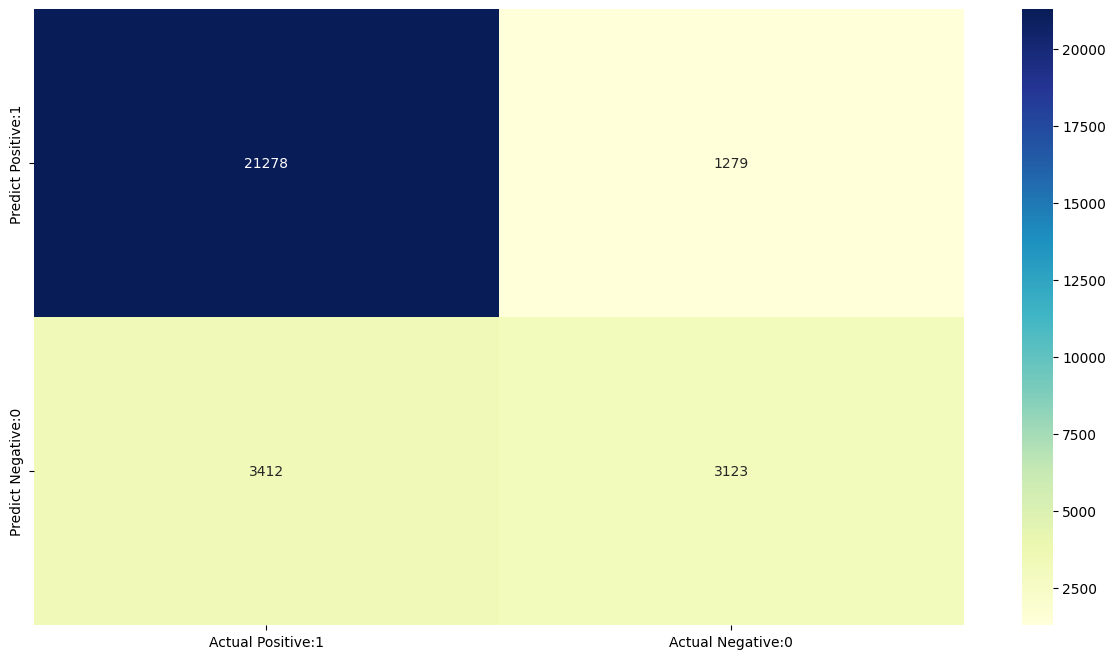

In [65]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm_logreg, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

Another method for checking accuracy is:

(TP + TN) / (TP + TN + FP + FN)

Sum of TP and TN is all of our corrected predicted and sum of TP, TN, FP and FN is our total 
probability.

And If we want to check classification error, we can simply use this method:

(FP + FN) / (TP + TN + FP + FN)

Which sum of FP and FN is our total wrong outcome

# Classification accuracy

In [66]:
TP = cm_logreg[0,0]
TN = cm_logreg[1,1]
FP = cm_logreg[0,1]
FN = cm_logreg[1,0]

In [67]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8388


# Classification error

In [68]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1612


# Precision

In [69]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9433


***Precision*** is defined as the percentage of correctly predicted positive outcomes out of all 
predicted positive outcomes. It can be calculated as the ratio of true positives (TP) to the 
sum of true positives and false positives (TP + FP).

In essence, precision highlights the proportion of correctly predicted positive outcomes 
and places more emphasis on the positive class than the negative class.

Mathematically, precision is expressed as the ratio of TP to (TP + FP).

# Recall

In [70]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8618


***Recall***, also known as Sensitivity, is defined as the percentage of correctly predicted 
positive outcomes out of all actual positive outcomes. It is calculated as the ratio of 
true positives (TP) to the sum of true positives and false negatives (TP + FN).

In essence, recall identifies the proportion of correctly predicted actual positives, 
thus providing insight into the model's ability to capture all positive instances.

Mathematically, recall is expressed as the ratio of TP to (TP + FN).


# Specificity

In [71]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7095


***Specificity***, or the True Negative Rate, measures how well a binary classification 
model identifies negative outcomes correctly. It's calculated as the ratio of true 
negatives to the sum of true negatives and false positives. High specificity means 
the model distinguishes negative instances well, complementing sensitivity, which 
focuses on positive instances.


# f1-score

In [72]:
f1_score = 2 * ((precision * recall) / (precision + recall))

print('f1_score : {0:0.4f}'.format(f1_score))

f1_score : 0.9007


The F1-score represents the weighted harmonic mean of precision and recall. A 
perfect F1-score is 1.0, while the worst possible score is 0.0. Since it accounts for 
both precision and recall, the F1-score typically falls below accuracy measures. It is 
essential to use the weighted average of F1-scores to compare classifier models 
rather than relying solely on global accuracy

#  Adjusting the threshold level 

In [73]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = LR_Model.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.74922574, 0.25077426],
       [0.83352119, 0.16647881],
       [0.82773124, 0.17226876],
       [0.62470227, 0.37529773],
       [0.88417189, 0.11582811],
       [0.97437908, 0.02562092],
       [0.75674727, 0.24325273],
       [0.29241034, 0.70758966],
       [0.8199204 , 0.1800796 ],
       [0.69065589, 0.30934411]])

In [74]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])

y_pred_prob_df

Prob of - No rain tomorrow (0)  Prob of - Rain tomorrow (1)
0                        0.749226                     0.250774
1                        0.833521                     0.166479
2                        0.827731                     0.172269
3                        0.624702                     0.375298
4                        0.884172                     0.115828
5                        0.974379                     0.025621
6                        0.756747                     0.243253
7                        0.292410                     0.707590
8                        0.819920                     0.180080
9                        0.690656                     0.309344

Observations:

Each row's numbers sum to 1.

There are 2 columns corresponding to 2 classes: 0 and 1.

Class 0 - predicted probability of no rain tomorrow.

Class 1 - predicted probability of rain tomorrow.

Classification Threshold Level:

A classification threshold level of 0.5 is set.

 Class 1 - rain is predicted if the probability > 0.5.

 Class 0 - no rain is predicted if the probability < 0.5.

In [75]:
# print the first 10 predicted probabilities for class 1 - Probability of rain

LR_Model.predict_proba(X_test)[0:10, 1]

array([0.25077426, 0.16647881, 0.17226876, 0.37529773, 0.11582811,
       0.02562092, 0.24325273, 0.70758966, 0.1800796 , 0.30934411])

In [76]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = LR_Model.predict_proba(X_test)[:, 1]

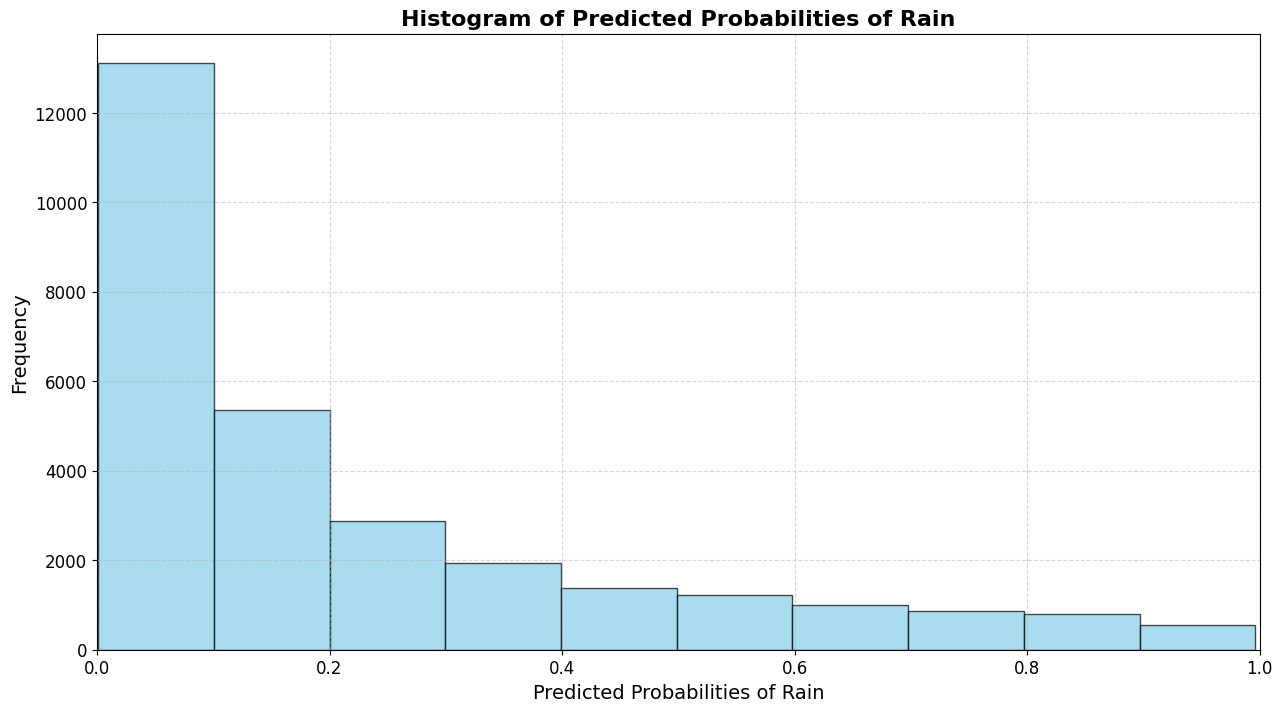

In [77]:


# Adjust the font size for better readability
plt.rcParams['font.size'] = 12

# Plot histogram with 10 bins and add some color
plt.hist(y_pred1, bins=10, color='skyblue', edgecolor='black', alpha=0.7)

# Set the title of predicted probabilities with larger font size and bold
plt.title('Histogram of Predicted Probabilities of Rain', fontsize=16, fontweight='bold')

# Set the x-axis limit
plt.xlim(0, 1)

# Label the x and y axes with larger font size
plt.xlabel('Predicted Probabilities of Rain', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Display the plot
plt.show()


***Observations***:
The histogram above indicates a highly positively skewed distribution.

The first column shows approximately 15,000 observations with probabilities between 0.0 
and 0.1.

There are only a few observations with probabilities greater than 0.5, suggesting rain 
tomorrow.

The majority of observations predict no rain tomorrow.

# ROC - AUC

In [78]:
y_scores = LR_Model.predict_proba(X_test)[:, 1]

In [79]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

print(roc_auc)


0.8563628266862094


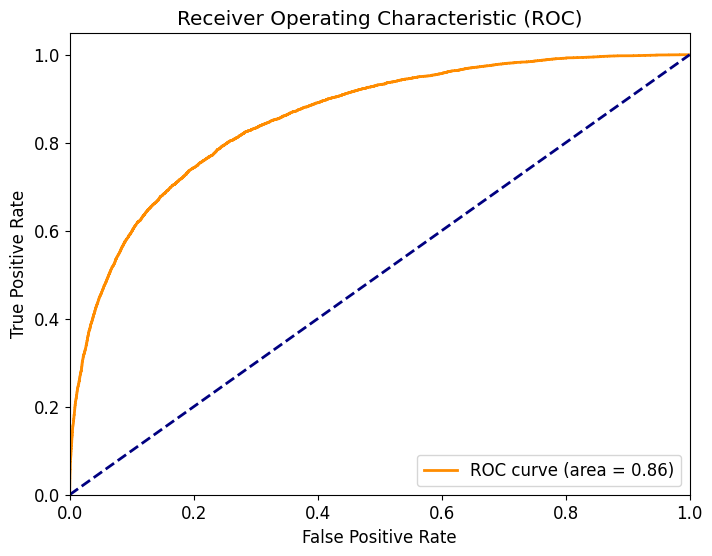

In [80]:
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Another valuable tool for visually evaluating classification model performance is the ROC 
Curve, short for Receiver Operating Characteristic Curve. It plots the performance of a 
classification model across various classification threshold levels.

The ROC Curve illustrates the True Positive Rate (TPR) against the False Positive Rate (FPR) 
at different threshold levels.

The True Positive Rate (TPR), also known as Recall, is defined as the ratio of TP to (TP + FN).

The False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN).

When examining the ROC Curve, we focus on the TPR (True Positive Rate) and FPR (False 
Positive Rate) of a single point, offering insight into the overall performance across various 
threshold levels. Lowering the threshold levels may result in more items being classified as 
positive, leading to increased True Positives (TP) and False Positives (FP).


The ROC AUC is a single-number summary of classifier performance. A higher value 
indicates better performance by the classifier.

Our model's ROC AUC approaches 1, suggesting that our classifier effectively predicts 
whether it will rain tomorrow.

The AUC score calculated from the ROC curve is printed here. It is represented as a 
floating-point number indicating the area under the ROC curve, which measures the 
model's ability to distinguish between classes. A higher AUC signifies better performance 
by the model.


# Conclusion
1. With an accuracy score of 0.85, the logistic regression model demonstrates 
commendable performance in forecasting tomorrow's rainfall in Australia.

2. A limited subset of observations indicates the likelihood of rain tomorrow, while 
the prevailing majority suggests otherwise.

3. There are no discernible indications of overfitting within the model.

4. Elevating the threshold level yields a corresponding enhancement in accuracy.

5. The ROC AUC of our model converges towards 1, affirming the effectiveness of 
our classifier in forecasting tomorrow's rainfall occurrence.


# Resources & Libraries
Observations were drawn from numerous weather stations. The daily observations 
are available from http://www.bom.gov.au/climate/data.

DataSet from https://www.kaggle.com/datasets/sphyg/weather-dataset-rattlepackage/data

An example of latest weather observations in Canberra: 
http://www.bom.gov.au/climate/dwo/IDCJDW2801.latest.shtml

Definitions adapted from http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml

Data source: http://www.bom.gov.au/climate/dwo/ and 
http://www.bom.gov.u/climate/data.

# Libraries:
1. Pandas: `import pandas as pd` - Used for data manipulation and analysis.
2. NumPy: `import numpy as np` - Used for numerical computing.
3. Matplotlib: `import matplotlib.pyplot as plt` - Used for data visualization.
4. Seaborn: `import seaborn as sns` - Used for statistical data visualization.
5. Plotly Express: `import plotly.express as px` - Used for interactive data 
visualization.
6. Category Encoders: `import category_encoders as ce` - Used for encoding 
categorical variables.
7. Scikit-learn:
- MinMaxScaler: `from sklearn.preprocessing import MinMaxScaler` - Used for 
feature scaling.
- Train Test Split: `from sklearn.model_selection import train_test_split` - Used for 
splitting data into training and testing sets.
- Logistic Regression: `from sklearn.linear_model import LogisticRegression` -
Used for logistic regression modeling.
- Cross-Validation: `from sklearn.model_selection import cross_val_score` - Used 
for cross-validation of models.
- Accuracy Score, Confusion Matrix, Classification Report: `from sklearn.metrics 
import accuracy_score, confusion_matrix, classification_report` - Used for model 
evaluation.
- ROC Curve, AUC Score: `from sklearn.metrics import roc_curve, auc` - Used for 
evaluating the performance of classification models.
8. Warnings: `import warnings` - Used to handle or ignore warning messages during 
execution.